# Dimensional Reduction

## Run following dimensional reduction algorithms for given fonts
1. Principal Component Analysis (PCA)
1. IsoMap
1. t-SNE

## Imports And Globals

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import font_utils.load_font as LF
reload(LF)

<module 'font_utils.load_font' from '/home/digital-tenebrist/ms-data-science/math-637/udel-math-637/utils/font_utils/load_font.py'>

## Read Courier Font
1. Returns dictionary for each variant with following fields
    1. df - pandas data frame with following trimming
        1. Retains m_label, and r0c0,...,r19c19 columns only
        1. No italic
        1. Only a-zA-Z0-9 returned
        1. Only min instances of each character based on min for a-zA-Z0-9
    1. min_char_count - number of instances of each character

In [45]:
lf = LF.LoadFont('garamond')
font_dict = lf.get_trimmed_font()
for k,v in font_dict.items():
    c=v['min_char_count']
    print(f'{k:25s} : {c}')

GARAMOND                  : 2


In [46]:
df = font_dict['GARAMOND']['df']

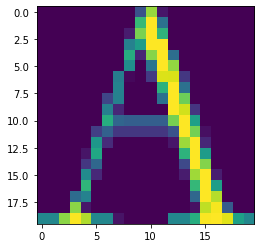

In [47]:
ltr_A_ar = df.loc[df.m_label == ord('A')].iloc[0]
plt.imshow(np.array(ltr_A_ar[1:], dtype=np.uint8).reshape(20,20))
plt.show()